In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
from pylab import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [2]:
insr_data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [3]:
insr_data.shape

(1000, 40)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
insr_data.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,02-01-2015,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,13-01-2015,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,27-02-2015,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,30-01-2015,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0,-39300,05-01-2015,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [6]:
insr_data['_c39'].value_counts()

Series([], Name: _c39, dtype: int64)

In [7]:
insr_data['_c39'].unique()

array([nan])

In [8]:
# It is clear from above that '_c39','policy_number', 'incident_location' are not going to affect our study; so dropping it:

auto_data = insr_data.drop(['_c39','policy_number', 'incident_location'], axis=1)

In [9]:
auto_data.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [10]:
# As columns in the dataset are randomly arranged , rearranging the columns of the dataset:

data_1 = auto_data[['policy_bind_date','policy_state','policy_csl','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','months_as_customer','insured_sex', 'age','insured_education_level','insured_occupation','insured_hobbies', 'insured_relationship','capital-gains','capital-loss','incident_date','incident_state','incident_city','incident_type','incident_severity','collision_type','incident_hour_of_the_day','number_of_vehicles_involved','authorities_contacted','property_damage','police_report_available','bodily_injuries','witnesses','auto_make', 'auto_model','auto_year','total_claim_amount', 'injury_claim','property_claim', 'vehicle_claim','fraud_reported']] 

In [11]:
data_1.head(15)

,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,months_as_customer,insured_sex,age,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_state,incident_city,incident_type,incident_severity,collision_type,incident_hour_of_the_day,number_of_vehicles_involved,authorities_contacted,property_damage,police_report_available,bodily_injuries,witnesses,auto_make,auto_model,auto_year,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,17-10-2014,OH,250/500,1000,1406.91,0,466132,328,MALE,48,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,SC,Columbus,Single Vehicle Collision,Major Damage,Side Collision,5,1,Police,YES,YES,1,2,Saab,92x,2004,71610,6510,13020,52080,Y
1,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,228,MALE,42,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,VA,Riverwood,Vehicle Theft,Minor Damage,?,8,1,Police,?,?,0,0,Mercedes,E400,2007,5070,780,780,3510,Y
2,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,134,FEMALE,29,PhD,sales,board-games,own-child,35100,0,22-02-2015,NY,Columbus,Multi-vehicle Collision,Minor Damage,Rear Collision,7,3,Police,NO,NO,2,3,Dodge,RAM,2007,34650,7700,3850,23100,N
3,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,256,FEMALE,41,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,OH,Arlington,Single Vehicle Collision,Major Damage,Front Collision,5,1,Police,?,NO,1,2,Chevrolet,Tahoe,2014,63400,6340,6340,50720,Y
4,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,228,MALE,44,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,NY,Arlington,Vehicle Theft,Minor Damage,?,20,1,None,NO,NO,0,1,Accura,RSX,2009,6500,1300,650,4550,N
5,12-10-2006,OH,250/500,1000,1351.10,0,478456,256,FEMALE,39,PhD,tech-support,bungie-jumping,unmarried,0,0,02-01-2015,SC,Arlington,Multi-vehicle Collision,Major Damage,Rear Collision,19,3,Fire,NO,NO,0,2,Saab,95,2003,64100,6410,6410,51280,Y
6,04-06-2000,IN,250/500,1000,1333.35,0,441716,137,MALE,34,PhD,prof-specialty,board-games,husband,0,-77000,13-01-2015,NY,Springfield,Multi-vehicle Collision,Minor Damage,Front Collision,0,3,Police,?,?,0,0,Nissan,Pathfinder,2012,78650,21450,7150,50050,N
7,03-02-1990,IL,100/300,1000,1137.03,0,603195,165,MALE,37,Associate,tech-support,base-jumping,unmarried,0,0,27-02-2015,VA,Columbus,Multi-vehicle Collision,Total Loss,Front Collision,23,3,Police,?,YES,2,2,Audi,A5,2015,51590,9380,9380,32830,N
8,05-02-1997,IL,100/300,500,1442.99,0,601734,27,FEMALE,33,PhD,other-service,golf,own-child,0,0,30-01-2015,WV,Arlington,Single Vehicle Collision,Total Loss,Front Collision,21,1,Police,NO,YES,1,1,Toyota,Camry,2012,27700,2770,2770,22160,N
9,25-07-2011,IL,100/300,500,1315.68,0,600983,212,MALE,42,PhD,priv-house-serv,camping,wife,0,-39300,05-01-2015,NC,Hillsdale,Single Vehicle Collision,Total Loss,Rear Collision,14,1,Other,NO,?,2,1,Saab,92x,1996,42300,4700,4700,32900,N


In [12]:
data_1['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

Combined single limit (CSL) CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury Liability coverage and Property Damage Liability coverage per occurrence or accident.

As policy_csl is given so its not necessary to keep the injury_claim, property_claim and vehicle_claim columns seperately. Total_claim is also given.

In [13]:
data_2 = data_1.drop(['injury_claim','property_claim', 'vehicle_claim'], axis=1)

In [14]:
data_3 = data_2.drop(['insured_zip'], axis=1)

In [15]:
data_3['policy_state'].unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [16]:
data_3['policy_deductable'].unique()

array([1000, 2000,  500], dtype=int64)

In [17]:
data_3['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

In [18]:
#As umbrella limit cannot be negative so removing '-' :

data_3['umbrella_limit'].replace(to_replace = -1000000, value = 1000000, inplace=True)

In [19]:
data_3['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000,  1000000,  2000000], dtype=int64)

In [20]:
data_3['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [21]:
data_3['collision_type'].replace(to_replace='?', value = 'NA', inplace=True)

In [22]:
data_3['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
NA                 178
Name: collision_type, dtype: int64

In [23]:
data_3['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [24]:
data_3['property_damage'].replace(to_replace='?', value = 'NA', inplace=True)

In [25]:
data_3['property_damage'].value_counts()

NA     360
NO     338
YES    302
Name: property_damage, dtype: int64

In [26]:
data_3['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [27]:
data_3['police_report_available'].replace(to_replace='?', value = 'NA', inplace=True)

In [28]:
data_3['police_report_available'].value_counts()

NO     343
NA     343
YES    314
Name: police_report_available, dtype: int64

Data Visualization

In [29]:
import matplotlib.pyplot as plt

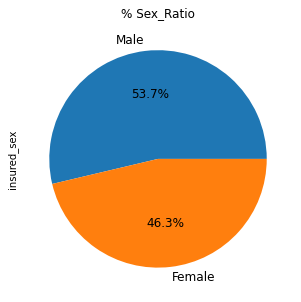

In [30]:
fig = plt.figure(figsize=(7,5))
ax = (data_3['insured_sex'].value_counts()*100.0 /len(data_3))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('% Sex_Ratio')
plt.show()

In [31]:
# trying to figure out that is there any affect of the month on incidents:
# extracting month from incident_date

data_3['month'] = pd.DatetimeIndex(data_3['incident_date']).month

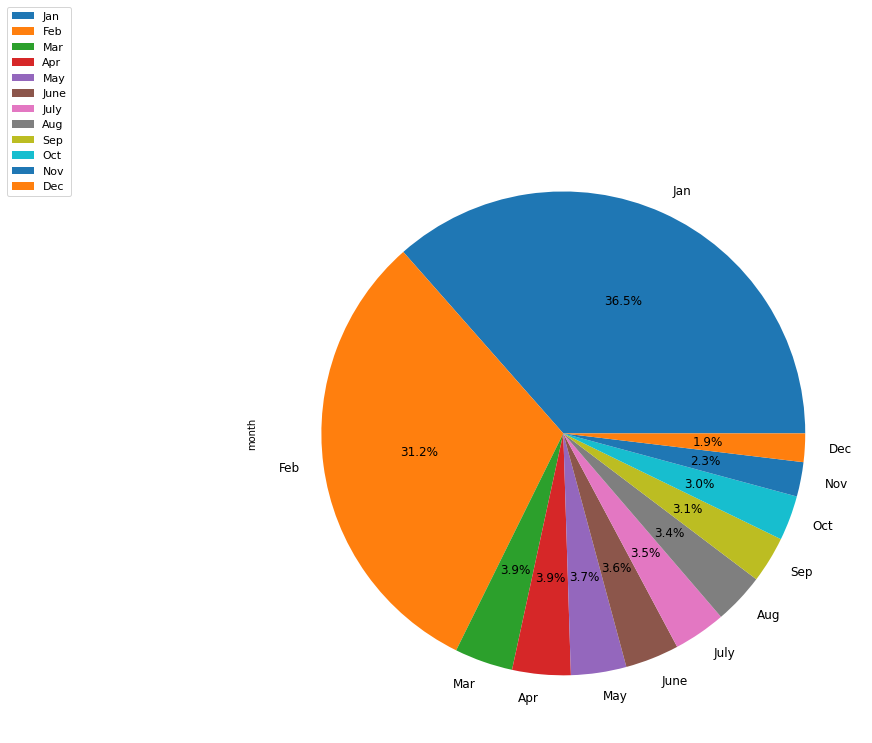

In [32]:
sizes = [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


fig1, ax1 = plt.subplots(figsize=(12, 12))
fig1.subplots_adjust(0.3, 0, 1, 1)

theme = plt.get_cmap('copper')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])

_, _ = ax.pie(sizes, startangle=90, radius=1800)
ax = (data_3['month'].value_counts()*100.0 /len(data_3))\
.plot.pie(autopct='%.1f%%', labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)

 
plt.legend(
    loc='upper left',
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure)

plt.show()

From this chart we can observe that the highest number of incidents are in the month of January followed by Feb.

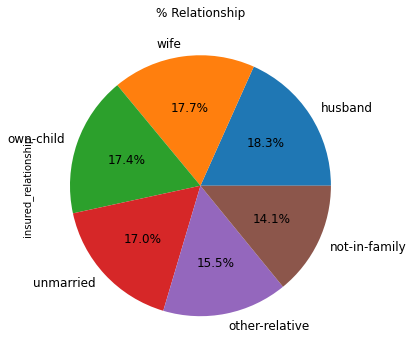

In [33]:
fig = plt.figure(figsize=(10,6))
ax = (data_3['insured_relationship'].value_counts()*100.0 /len(data_3))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)                                                                           
ax.set_title('% Relationship')
plt.show()

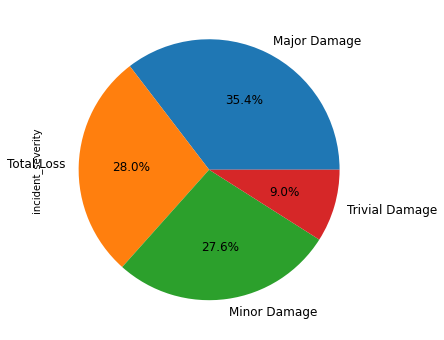

In [34]:
fig = plt.figure(figsize=(10,6))
ax = (data_3['incident_severity'].value_counts()*100.0 /len(data_3))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
         fontsize=12)

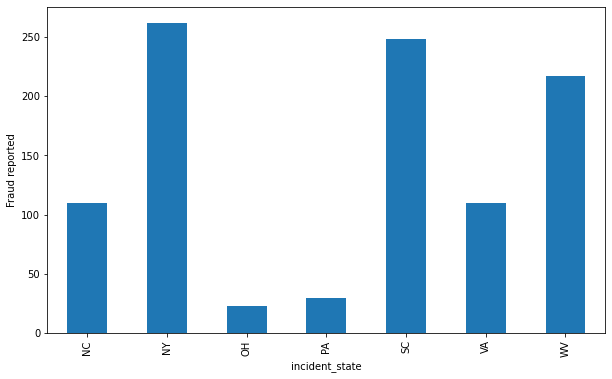

In [35]:
fig = plt.figure(figsize=(10,6))
ax = data_3.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

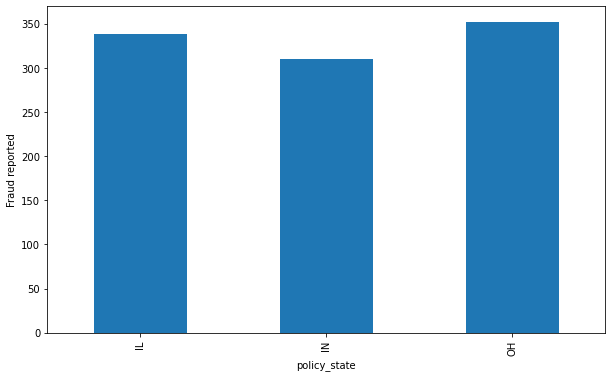

In [36]:
fig = plt.figure(figsize=(10,6))
ax = data_3.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

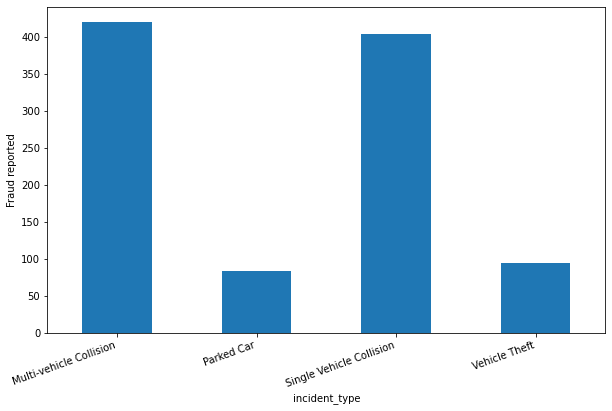

In [37]:
fig = plt.figure(figsize=(10,6))
ax = data_3.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

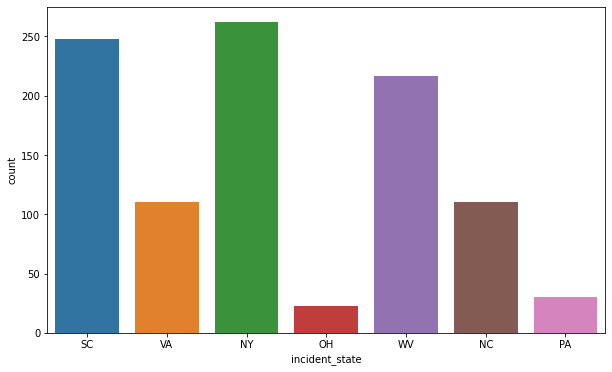

In [38]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_state', data=data_3)

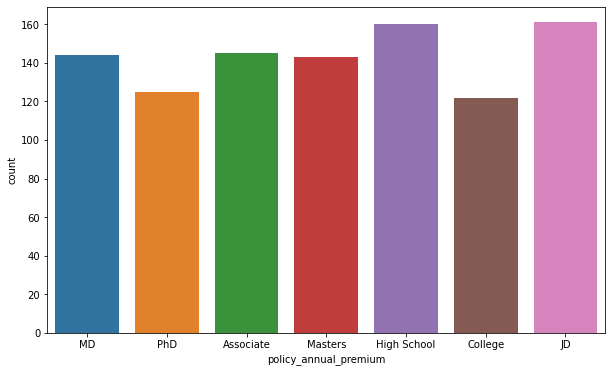

In [39]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x = 'insured_education_level', data=data_3) 
ax.set_xlabel('policy_annual_premium')
plt.show()

In [40]:
# extracting the age of Vehicle from auto_year, as all the incidents are of the year 2015 :

data_3['Vehicle_Age'] = 2015 - data_3['auto_year'] 

=> Policy bind date and incident date can give the difference of time between policy taken and occurence of incident.
   Right now I am leaving it due to shartage of time.

In [41]:
# Dealing with time it can tell us that at what time of the day major of the incidents occur:

bins = [-1, 3, 6, 9, 12, 17, 20, 24]  # Factorize according to the time period of the day.

names = ["midnight", "early_morning", "late_morning", "afternoon", "evening", "night", "late_night"]

data_3['incident_part_of_day'] = pd.cut(data_3.incident_hour_of_the_day, bins, labels=names).astype(object)

data_3[['incident_hour_of_the_day', 'incident_part_of_day']].head(10)

,incident_hour_of_the_day,incident_part_of_day
0,5,early_morning
1,8,late_morning
2,7,late_morning
3,5,early_morning
4,20,night
5,19,night
6,0,midnight
7,23,late_night
8,21,late_night
9,14,evening


In [42]:
# As property damage, police report available are having values NA (not available) so they cannot be converted here:
# converting fraud_reported and insured_sex into binary:

data_3['fraud_reported'].replace(to_replace ='Y', value=1, inplace=True)
data_3['fraud_reported'].replace(to_replace ='N',  value=0, inplace=True)
data_3['insured_sex'].replace(to_replace ='FEMALE', value=1, inplace=True)
data_3['insured_sex'].replace(to_replace ='MALE',  value=0, inplace=True)

In [43]:
# importing one hot encoder from sklearn
# There are changes in OneHotEncoder class

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [44]:
data_4 = data_3.drop(columns = ['month','auto_year','incident_date','policy_bind_date']) 

In [45]:
cat_features = data_4.select_dtypes(include='O').keys()

In [46]:
cat_features

Index(['policy_state', 'policy_csl', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_state', 'incident_city', 'incident_type', 'incident_severity',
       'collision_type', 'authorities_contacted', 'property_damage',
       'police_report_available', 'auto_make', 'auto_model',
       'incident_part_of_day'],
      dtype='object')

In [47]:
cat_features = ['policy_state', 'policy_csl', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_state', 'incident_city', 'incident_type', 'incident_severity',
       'collision_type', 'authorities_contacted', 'property_damage',
       'police_report_available', 'auto_make', 'auto_model',
       'incident_part_of_day'] 

from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
data_4[cat_features] = data_4[cat_features].apply(lambda col: le.fit_transform(col))    


In [48]:
data_4

,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,months_as_customer,insured_sex,age,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_state,incident_city,incident_type,incident_severity,collision_type,incident_hour_of_the_day,number_of_vehicles_involved,authorities_contacted,property_damage,police_report_available,bodily_injuries,witnesses,auto_make,auto_model,total_claim_amount,fraud_reported,Vehicle_Age,incident_part_of_day
0,2,1,1000,1406.91,0,328,0,48,4,2,17,0,53300,0,4,1,2,0,3,5,1,4,2,2,1,2,10,1,71610,1,11,1
1,1,1,2000,1197.22,5000000,228,0,42,4,6,15,2,0,0,5,5,3,1,1,8,1,4,0,0,0,0,8,12,5070,1,8,3
2,2,0,2000,1413.14,5000000,134,1,29,6,11,2,3,35100,0,1,1,0,1,2,7,3,4,1,1,2,3,4,30,34650,0,8,3
3,0,1,2000,1415.74,6000000,256,1,41,6,1,2,4,48900,-62400,2,0,2,0,0,5,1,4,0,1,1,2,3,34,63400,1,1,1
4,0,2,1000,1583.91,6000000,228,0,44,0,11,2,4,66000,-46000,1,0,3,1,1,20,1,2,1,1,0,1,0,31,6500,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,2,1000,1310.80,0,3,1,38,5,2,13,4,0,0,0,4,2,1,0,20,1,1,2,0,0,1,6,6,87200,0,9,6
996,0,0,1000,1436.79,0,285,1,41,6,9,17,5,70900,0,4,3,2,0,2,23,1,1,2,0,2,3,13,28,108480,0,0,4
997,2,1,500,1383.49,3000000,130,1,34,5,1,3,2,35100,0,0,0,0,1,3,4,3,4,0,2,2,3,11,19,67500,0,19,1
998,0,2,2000,1356.92,5000000,458,0,62,0,5,0,5,0,0,1,0,2,0,2,2,1,3,0,2,0,1,1,5,46980,0,17,5


In [49]:
data_f = pd.get_dummies(data_4, columns = cat_features)

In [50]:
data_f.head()

,policy_deductable,policy_annual_premium,umbrella_limit,months_as_customer,insured_sex,age,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,fraud_reported,Vehicle_Age,policy_state_0,policy_state_1,policy_state_2,policy_csl_0,policy_csl_1,policy_csl_2,insured_education_level_0,insured_education_level_1,insured_education_level_2,insured_education_level_3,insured_education_level_4,insured_education_level_5,insured_education_level_6,insured_occupation_0,insured_occupation_1,insured_occupation_2,insured_occupation_3,insured_occupation_4,insured_occupation_5,insured_occupation_6,insured_occupation_7,insured_occupation_8,insured_occupation_9,insured_occupation_10,insured_occupation_11,insured_occupation_12,insured_occupation_13,insured_hobbies_0,insured_hobbies_1,insured_hobbies_2,insured_hobbies_3,insured_hobbies_4,insured_hobbies_5,insured_hobbies_6,insured_hobbies_7,insured_hobbies_8,insured_hobbies_9,insured_hobbies_10,insured_hobbies_11,insured_hobbies_12,insured_hobbies_13,insured_hobbies_14,insured_hobbies_15,insured_hobbies_16,insured_hobbies_17,insured_hobbies_18,insured_hobbies_19,insured_relationship_0,insured_relationship_1,insured_relationship_2,insured_relationship_3,insured_relationship_4,insured_relationship_5,incident_state_0,incident_state_1,incident_state_2,incident_state_3,incident_state_4,incident_state_5,incident_state_6,incident_city_0,incident_city_1,incident_city_2,incident_city_3,incident_city_4,incident_city_5,incident_city_6,incident_type_0,incident_type_1,incident_type_2,incident_type_3,incident_severity_0,incident_severity_1,incident_severity_2,incident_severity_3,collision_type_0,collision_type_1,collision_type_2,collision_type_3,authorities_contacted_0,authorities_contacted_1,authorities_contacted_2,authorities_contacted_3,authorities_contacted_4,property_damage_0,property_damage_1,property_damage_2,police_report_available_0,police_report_available_1,police_report_available_2,auto_make_0,auto_make_1,auto_make_2,auto_make_3,auto_make_4,auto_make_5,auto_make_6,auto_make_7,auto_make_8,auto_make_9,auto_make_10,auto_make_11,auto_make_12,auto_make_13,auto_model_0,auto_model_1,auto_model_2,auto_model_3,auto_model_4,auto_model_5,auto_model_6,auto_model_7,auto_model_8,auto_model_9,auto_model_10,auto_model_11,auto_model_12,auto_model_13,auto_model_14,auto_model_15,auto_model_16,auto_model_17,auto_model_18,auto_model_19,auto_model_20,auto_model_21,auto_model_22,auto_model_23,auto_model_24,auto_model_25,auto_model_26,auto_model_27,auto_model_28,auto_model_29,auto_model_30,auto_model_31,auto_model_32,auto_model_33,auto_model_34,auto_model_35,auto_model_36,auto_model_37,auto_model_38,incident_part_of_day_0,incident_part_of_day_1,incident_part_of_day_2,incident_part_of_day_3,incident_part_of_day_4,incident_part_of_day_5,incident_part_of_day_6
0,1000,1406.91,0,328,0,48,53300,0,5,1,1,2,71610,1,11,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2000,1197.22,5000000,228,0,42,0,0,8,1,0,0,5070,1,8,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2000,1413.14,5000000,134,1,29,35100,0,7,3,2,3,34650,0,8,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2000,1415.74,6000000,256,1,41,48900,-62400,5,1,1,2,6340

In [51]:
data_f.shape

(1000, 165)

In [54]:
corr_matrix = data_4.corr()

In [55]:
corr_matrix

,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,months_as_customer,insured_sex,age,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_state,incident_city,incident_type,incident_severity,collision_type,incident_hour_of_the_day,number_of_vehicles_involved,authorities_contacted,property_damage,police_report_available,bodily_injuries,witnesses,auto_make,auto_model,total_claim_amount,fraud_reported,Vehicle_Age,incident_part_of_day
policy_state,1.000000,0.001027,0.010033,0.012455,-0.028558,-0.000328,0.020481,-0.014533,-0.034327,-0.031215,-0.038689,-0.018506,0.074551,-0.030338,0.008723,-0.002077,0.031848,-0.026377,0.057763,0.029457,-0.042263,-0.016777,0.008623,0.071950,0.013384,0.022960,0.017124,-0.025253,-0.006002,0.029432,-0.002114,-0.023970
policy_csl,0.001027,1.000000,0.003384,0.023978,0.020614,-0.026819,0.010757,-0.015185,0.009153,0.015788,-0.005960,-0.030063,0.005249,-0.034612,0.032814,0.009333,0.011997,0.022530,-0.004458,-0.001869,-0.019403,0.056182,-0.027340,0.002424,-0.000595,0.071500,-0.004701,0.047885,-0.055758,-0.037190,0.033082,-0.012421
policy_deductable,0.010033,0.003384,1.000000,-0.003245,0.009968,0.026807,0.009733,0.029188,0.015217,-0.046733,0.004061,-0.022945,0.035212,-0.023544,0.006517,-0.045117,-0.038411,-0.015711,-0.054085,0.060935,0.051214,-0.000760,0.016900,0.030166,-0.022765,0.066639,-0.035379,-0.003268,0.022839,0.014817,-0.026105,0.046658
policy_annual_premium,0.012455,0.023978,-0.003245,1.000000,-0.005956,0.005018,-0.038853,0.014404,-0.019715,0.035922,-0.018019,0.001925,-0.013738,0.023547,0.046434,0.048724,0.053603,-0.011155,0.037877,-0.001578,-0.045991,-0.055191,0.095359,0.013624,0.026780,0.002332,0.000045,-0.031849,0.009094,-0.014480,0.049226,-0.007699
umbrella_limit,-0.028558,0.020614,0.009968,-0.005956,1.000000,0.016111,-0.011630,0.018425,-0.020692,0.023290,-0.036820,0.078868,-0.048074,-0.023235,-0.078836,0.011834,0.016640,0.008372,-0.002203,-0.023097,-0.021997,0.027824,-0.055844,-0.057018,0.021698,-0.007123,-0.005211,0.040717,-0.038994,0.058147,-0.008578,-0.000240
months_as_customer,-0.000328,-0.026819,0.026807,0.005018,0.016111,1.000000,-0.060925,0.922098,-0.000833,0.009814,-0.093661,0.069727,0.006399,0.020209,0.005369,-0.000130,-0.017377,-0.059581,-0.065432,0.070639,0.014736,0.010021,0.007040,0.017647,-0.010162,0.058383,0.047655,0.004202,0.062108,0.020544,0.000292,0.011561
insured_sex,0.020481,0.010757,0.009733,-0.038853,-0.011630,-0.060925,1.000000,-0.073337,-0.009002,0.006160,0.020317,-0.002855,0.020494,0.021705,0.022379,-0.014470,-0.009952,0.028168,0.021391,-0.019290,-0.018793,-0.017914,-0.029293,-0.020864,0.020297,-0.042463,-0.026457,0.018421,0.023727,-0.030873,-0.028247,-0.008250
age,-0.014533,-0.015185,0.029188,0.014404,0.018425,0.922098,-0.073337,1.000000,0.000969,0.017220,-0.081315,0.074832,-0.007075,0.007368,0.005770,-0.002291,-0.025626,-0.058439,-0.071117,0.087161,0.022102,0.015417,-0.001486,0.014661,-0.015679,0.052359,0.030410,0.017343,0.069863,0.012143,-0.001354,0.038116
insured_education_level,-0.034327,0.009153,0.015217,-0.019715,-0.020692,-0.000833,-0.009002,0.000969,1.000000,-0.020298,0.021807,-0.023488,0.039912,0.041193,-0.005903,-0.018636,0.013704,-0.006420,-0.008073,-0.057061,-0.003768,-0.010838,-0.025290,0.036141,-0.012072,0.019211,0.055202,0.049445,0.074226,0.008808,-0.043509,-0.037830
insured_occupation,-0.031215,0.015788,-0.046733,0.035922,0.023290,0.009814,0.006160,0.017220,-0.020298,1.000000,-0.011077,-0.010171,-0.007824,-0.020171,-0.022761,0.000390,0.003842,0.004731,0.007141,-0.018435,-0.015368,-0.007811,0.010697,-0.011083,-0.000236,-0.014794,0.042621,0.020584,0.003692,0.001564,0.006676,0.008722


In [ ]:
X = data_f.drop(columns = ['collision_type'])
X.head(2)

In [56]:
# seperating the target variable and predictor data:

X = data_f.drop(columns = ['fraud_reported'])

In [57]:
y = data_f['fraud_reported']

In [60]:
# splitting dataset into training and testing part:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1234)

print('length of X_train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and X_test:  800 200
length of y_train and y_test:  800 200


In [61]:
# checking the quality of data:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# evaluate an LDA model on the dataset using k-fold cross validation
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=5, random_state=7)
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.841


It means our data is now ready for further analysis.

MODEL BUILDING

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, cohen_kappa_score
from sklearn import metrics 

# Baseline Random forest based Model
rfc = RandomForestClassifier(criterion = 'gini', n_estimators=1000, verbose=1, n_jobs = -1, 
                             class_weight = 'balanced', max_features = 'auto')

# training the dataset:

model_rfc = rfc.fit(X_train,y_train) 
predictions = model_rfc.predict(X_test)

print('Baseline: N_features: ', len(list(X.columns)))
print('Baseline: Accuracy: ', round(accuracy_score(y_test, predictions)*100, 2))
print( 'Cohen Kappa: '+ str(np.round(cohen_kappa_score(y_test, predictions),3)))
print('Baseline: Recall: ', round(recall_score(y_test, predictions)*100, 2))
print('\n Classification Report:\n', classification_report(y_test,predictions))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s


Baseline: N_features:  164
Baseline: Accuracy:  75.0
Cohen Kappa: 0.285
Baseline: Recall:  27.87

 Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.96      0.84       139
           1       0.74      0.28      0.40        61

    accuracy                           0.75       200
   macro avg       0.75      0.62      0.62       200
weighted avg       0.75      0.75      0.71       200



[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.4s finished


Confusion matrix
[[133   6]
 [ 44  17]]


<Figure size 432x288 with 0 Axes>

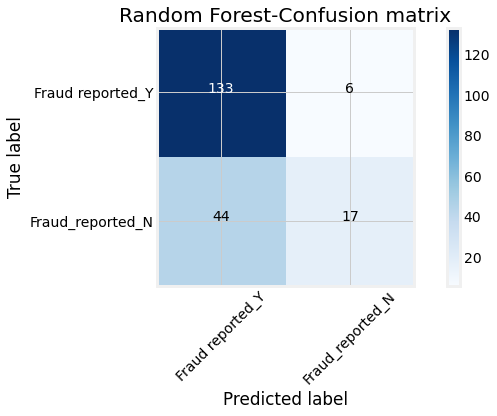

In [63]:
from sklearn.metrics import confusion_matrix
import itertools

#Evaluation of RFModel - Confusion Matrix Plot

def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize=False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print('Confusion matrix')

    print(cm)

    fig = plt.figure(figsize=(10,6))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fraud reported_Y','Fraud_reported_N'],
                      title='Random Forest-Confusion matrix')

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier


logreg2= LogisticRegressionCV(solver='lbfgs', cv=10)
knn = KNeighborsClassifier(5)
svcl = SVC()
adb = AdaBoostClassifier()
dtclf = DecisionTreeClassifier(max_depth=5)
rfclf = RandomForestClassifier()

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('ADA', AdaBoostClassifier(n_estimators=100)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



LR: 0.816250 (0.052752)
KNN: 0.732500 (0.029155)
DT: 0.795000 (0.022500)
SVM: 0.776250 (0.025280)
RF: 0.750000 (0.018540)
ADA: 0.786250 (0.038911)


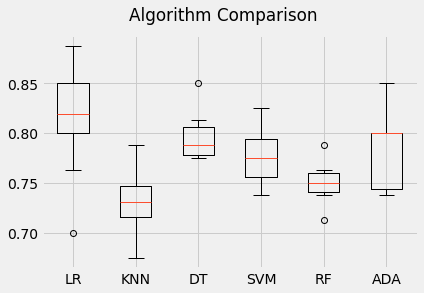

In [67]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

From above we can conclude that LogisticRegression and DecisionTreeClassifier are having the higest accuracy score.